#Final Project#


In [ ]:
!pip install tweepy
!pip install requests==2.23.0
!pip install folium==0.2.1
!pip install --upgrade tweepy
!pip install emoji
!pip install -U spacy
!python -m spacy download en

     |████████████████████████████████| 69 kB 3.2 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=02bf23c5be084803e3ce4ae988c8bf1a850dedc9382e5b6dbae087b0b0c5a5d9
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 77 kB 2.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the p

In [2]:
import tensorflow_datasets
import tensorflow as tf
import numpy as np
import pandas
import matplotlib.pyplot as plt
import csv
import pandas as pd
from os import write
import tweepy
import re
import spacy as sp

In [ ]:

def give_emoji_free_text(self, text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])

    return clean_text

In [ ]:
#0 is democrat, 1 is republican
#help from https://medium.com/@robguilarr/making-queries-to-twitter-api-on-tweepy-66afeb7184a4

def make_tweets_d(hashtags = []):
  client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAL7UbQEAAAAA%2FqR5jYCoUB7%2FvFPx2AEEiXX%2B%2FlM%3DFL6indMpRE0wtKNkIKkzroYye0kbNytitlpzTGTagDReuvItzL')

  col_names = ['tweet', 'bias']
  df = pd.DataFrame(columns = col_names)
  tweet_list = []

  for hashtag in hashtags:
    
    query = f'{hashtag} -is:retweet' #this is just whatever query, this is the twitter handle excluding retweets

    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                                  tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000):
      clean_tweet = re.sub("@[A-Za-z0-9_#]+","", tweet.text)
      #clean_tweet = give_emoji_free_text(clean_tweet)
      tweet_list.append(clean_tweet)
  

  df['tweet'] = tweet_list

  test_col = []
  for i in range(len(df.index)):
    test_col.append(0)

  df['bias'] = test_col

  return df

def make_tweets_r(hashtags = []):
  client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAL7UbQEAAAAA%2FqR5jYCoUB7%2FvFPx2AEEiXX%2B%2FlM%3DFL6indMpRE0wtKNkIKkzroYye0kbNytitlpzTGTagDReuvItzL')

  col_names = ['tweet', 'bias']
  df = pd.DataFrame(columns = col_names)
  tweet_list = []

  for hashtag in hashtags:
    
    query = f'{hashtag} -is:retweet' #this is just whatever query, this is the twitter handle excluding retweets

    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                                  tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000):
      clean_tweet = re.sub("@[A-Za-z0-9_#]+","", tweet.text)
      #clean_tweet = give_emoji_free_text(clean_tweet)
      tweet_list.append(clean_tweet)
  

  df['tweet'] = tweet_list

  test_col = []
  for i in range(len(df.index)):
    test_col.append(1)

  df['bias'] = test_col

  return df

In [ ]:
d_df = make_tweets_d(['#january6th', '#cnn', '#traitors', '#prochoice'])
r_df = make_tweets_r(['#stopthesteal', '#antifa', '#notmypresident', '#prolife'])

In [ ]:
combined_df = pd.concat([d_df, r_df], ignore_index=True)
combined_df.to_csv('Tweets5.0.csv', index = None, encoding = 'utf-8-sig')

In [3]:
#creates input file
intputFile = 'Tweets3.0.csv'

#creates datasets by splitting input file
train_dataset = np.array(pandas.read_csv(intputFile,nrows=3500, delimiter=',',usecols=['tweet','bias'],skip_blank_lines=True))
test_dataset = np.array(pandas.read_csv(intputFile,skiprows=[i for i in range(1,3500)], delimiter=',',usecols=['tweet','bias'],skip_blank_lines=True))

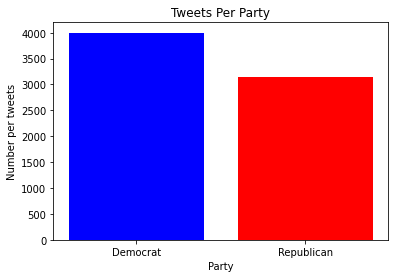

Size of data set: 7146
Number of democrat tweets: 4000
Number of republican tweets: 3146


In [4]:
data = pd.read_csv("Tweets3.0.csv") 

b = data['bias'].tolist()

dem = 0
rep = 0
x = 0
for i in b:
  if b[x] == 0:
    dem += 1
  else:
    rep += 1
  x +=1

Party = ['Democrat', 'Republican']
Tweets = [dem, rep]
New_Colors = ['blue','red']
plt.bar(Party, Tweets, color=New_Colors)

plt.title('Tweets Per Party')
plt.xlabel('Party')
plt.ylabel('Number per tweets')
plt.show()

print("Size of data set:", len(b))
print("Number of democrat tweets:",dem)
print("Number of republican tweets:",rep)


In [5]:
print(train_dataset.shape)
print(test_dataset.shape)

(3500, 2)
(3647, 2)


In [6]:
#creates the train and test numpy arrays/tensors
x_train = []
y_train = []

for sample, label in train_dataset:
  sample = tf.convert_to_tensor(sample)
  label = tf.convert_to_tensor(label)
  x_train.append(sample.numpy())
  y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset:
  sample = tf.convert_to_tensor(sample)
  label = tf.convert_to_tensor(label)
  x_test.append(sample.numpy())
  y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])

print()
print(x_train.shape)
print(x_test.shape)


b'#WeWontForget #Betrayal #Parasite #ThisIsNotJournalism #Complicit #Traitors #WeSeeYou #Scumbags #Grub #Presstitute #PoliticalActivist  #Criminal #MurdochMuppets #CancelFairfax  #AbcSaboteurs #AbscondmentDay #SackTheHack #CrumbMaiden https://t.co/FYyXJYf8Si https://t.co/gdGSofMIfy'
0
b'@cynthiamckinney More Testimonies will come from #US...!!\n\nRight now, When the #Traitors inside will #Fight over the #Stolen Goods, The #World will See...!!\n\n#\xd8\xa7\xd9\x85\xd9\xbe\xd9\x88\xd8\xb1\xd9\xb9\xda\x88_\xd8\xad\xda\xa9\xd9\x88\xd9\x85\xd8\xaa_\xd9\x86\xd8\xa7\xd9\x85\xd9\x86\xd8\xb8\xd9\x88\xd8\xb1'
0

(3500,)
(3647,)


In [7]:
#sets the vocab size and creates the vectorize layer
max_words = 1000
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_words)

vectorize_layer.adapt(x_train)

In [8]:
#creates the vocab starting at 25 to 100
vocab = np.array(vectorize_layer.get_vocabulary())
vocab[25:100]

array(['it', 'i', 'be', 'abortion', 'with', 'gop', 'have', 'your',
       'trump', 'all', 'we', 'will', 'was', 'their', 'what', 'people',
       'if', 'who', 'from', 'like', 'so', 'as', 'or', 'foxnews', 'an',
       'but', 'no', 'ukraine', 'by', 'our', 'die', 'stopthesteal', 'do',
       'msnbc', 'he', 'maga', 'at', 'about', 'just', 'how', 'out', 'der',
       'news', 'blm', 'und', 'us', 'get', 'up', 'biden', 'more', 'when',
       'his', 'women', 'de', 'should', 'right', 'one', 'why', 'has',
       'criminal', 'ist', 'my', 'now', 'can', 'its', 'were', 'via',
       'democrats', 'abortionishealthcare', 'life', 'steinmeier',
       'complicit', 'weseeyou', 'betrayal', 'republicans'], dtype='<U31')

In [9]:
#print tweets used for vectorization
print(x_train[:2])
vectorized = vectorize_layer(x_train[:2]).numpy()
print(vectorized)

[b'#WeWontForget #Betrayal #Parasite #ThisIsNotJournalism #Complicit #Traitors #WeSeeYou #Scumbags #Grub #Presstitute #PoliticalActivist  #Criminal #MurdochMuppets #CancelFairfax  #AbcSaboteurs #AbscondmentDay #SackTheHack #CrumbMaiden https://t.co/FYyXJYf8Si https://t.co/gdGSofMIfy'
 b'#POTUS \n#SCOTUS \n#GOP \n#DNC \n#FoxNews \n#CNN \n#Antifa \n#BlackLivesMatter \n#PONTIFEX \n#CopelandNetwork \n#UN \n#NATO \n#WSJ \n#NYSE\n#California \n#Mexico \n#Canada \n\nThis is happening on the sun.\nBe aware of this until the end of this month.\n\nCORONAL MASS EJECTION\nhttps://t.co/7X3BuJ765D']
[[102  98 101 103  96  14  97 104 110 106 107  84 109 111 113 112 105 116
    1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [100 173  30 160  48  10  15 121 232 248 120 166 122 225 196 244 187  20
    7   1  22   2   1  27   1   5  20 534   2 454   5  20   1   1 911   1
    1]]


In [10]:
#convert tensors to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)

(3500,)
(3647,)


In [11]:
#create the model
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
#compiles the model and conducts the history using early stop and model saves for best weights
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/15
55/55 [==============================] - 19s 124ms/step - loss: 0.6894 - accuracy: 0.5560 - val_loss: 0.6848 - val_accuracy: 0.5640
Epoch 2/15
55/55 [==============================] - 4s 65ms/step - loss: 0.6776 - accuracy: 0.5600 - val_loss: 0.6662 - val_accuracy: 0.5912
Epoch 3/15
55/55 [==============================] - 4s 65ms/step - loss: 0.6244 - accuracy: 0.7043 - val_loss: 0.5433 - val_accuracy: 0.8555
Epoch 4/15
55/55 [==============================] - 4s 65ms/step - loss: 0.3909 - accuracy: 0.9346 - val_loss: 0.3321 - val_accuracy: 0.9438
Epoch 5/15
55/55 [==============================] - 4s 65ms/step - loss: 0.2629 - accuracy: 0.9671 - val_loss: 0.2933 - val_accuracy: 0.9539
Epoch 6/15
55/55 [==============================] - 4s 65ms/step - loss: 0.2191 - accuracy: 0.9697 - val_loss: 0.2524 - val_accuracy: 0.9567
Epoch 7/15
55/55 [==============================] - 4s 65ms/step - loss: 0.1756 - accuracy: 0.9803 - val_loss: 0.2614 - val_accuracy: 0.9564
Epoch 8/15


(0.0, 0.7198945861309767)

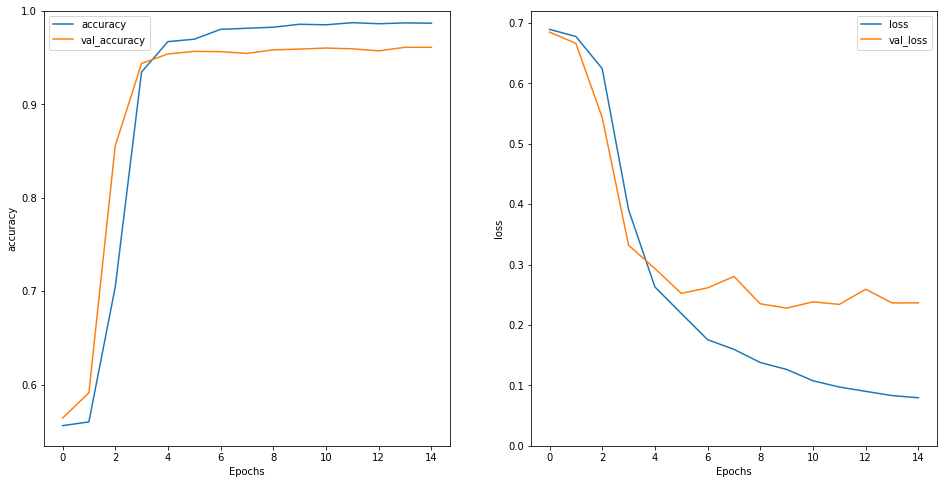

In [14]:
#plots accuracy and loss values
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [15]:
#provides the overall accuracy and loss scores
scores = model.evaluate(x_train, y_train, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_test, y_test, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])


TRAINING SET
Loss: 0.07356578856706619 
Accuracy: 0.9885714054107666

TEST SET
Loss: 0.23665758967399597 
Accuracy: 0.9610638618469238


In [16]:
#runs a predictive model
model.fit(x_train, y_train)

yfit = model.predict(x_test)

110/110 [==============================] - 4s 40ms/step - loss: 0.0799 - accuracy: 0.9877


In [17]:
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

#rounds predictions for analysis
y_pred = np.where(yfit > 0.5, 1, 0)

#prints error and variance values
print("Max Error: ", max_error(y_test, y_pred))
print("Explained Variance Score: ", explained_variance_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Median Absolute Error: ", median_absolute_error(y_test,y_pred))

Max Error:  1
Explained Variance Score:  0.8442608227052273
Mean Absolute Error:  0.03838771593090211
Median Absolute Error:  0.0


In [18]:
from sklearn.metrics import classification_report
#prints classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2051
           1       0.96      0.95      0.96      1596

    accuracy                           0.96      3647
   macro avg       0.96      0.96      0.96      3647
weighted avg       0.96      0.96      0.96      3647



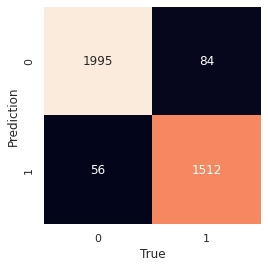

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

#creates the confusion matrix using the predicted values
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels="auto", yticklabels="auto")
plt.xlabel('True')
plt.ylabel('Prediction');

#Performance
Our LSTM performed with above 90% accuracy for the training and testing sets.

The LSTM performs best when more tweets are in use. For example, a csv file with 10 representatives (5 democrat and 5 republican) would perform very well if each person had 10000 tweets listed. A csv file with the same representatives but only 500 tweets per person would perform much worse.

This is due to the vocabulary used. More samples means the LSTM can find more matching vocab for each party and produce better predictions.





